In [1]:
from advanced_indicators.myfunctions import * 
import matplotlib.pyplot as plt

In [2]:
#-- Load data
# data = pd.read_csv(r"")
import yfinance as yf 

data = yf.download('GOOG', '2022-01-01','2024-03-01')

#-- all column names lowercase
data.columns = map(str.lower, data.columns)

[*********************100%***********************]  1 of 1 completed


In [3]:
# disparity_idx_indc(data)
# disp = disp_idx(data, 14)


df_X = rvi_signals(data)

In [4]:
df_X

,open,high,low,close,adj close,volume,rvi,rvi_signal,buy_long,sell_short
Date,,,,,,,,,,
2022-01-03,144.475494,145.550003,143.502502,145.074493,145.074493,25214000,NaN,NaN,False,False
2022-01-04,145.550507,146.610001,143.816147,144.416504,144.416504,22928000,NaN,NaN,False,False
2022-01-05,144.181000,144.298004,137.523499,137.653503,137.653503,49642000,NaN,NaN,False,False
2022-01-06,137.497498,139.686005,136.763504,137.550995,137.550995,29050000,NaN,NaN,False,False
2022-01-07,137.904999,138.254745,135.789001,137.004501,137.004501,19408000,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...
2024-02-23,144.970001,145.955002,144.789993,145.289993,145.289993,14519400,0.022227,0.053886,False,False
2024-02-26,143.449997,143.839996,138.740005,138.750000,138.750000,33513000,-0.246088,0.023036,False,False
2024-02-27,139.410004,140.490005,138.500000,140.100006,140.100006,22364000,-0.188970,0.005116,False,False


KeyError: 'deMarker'

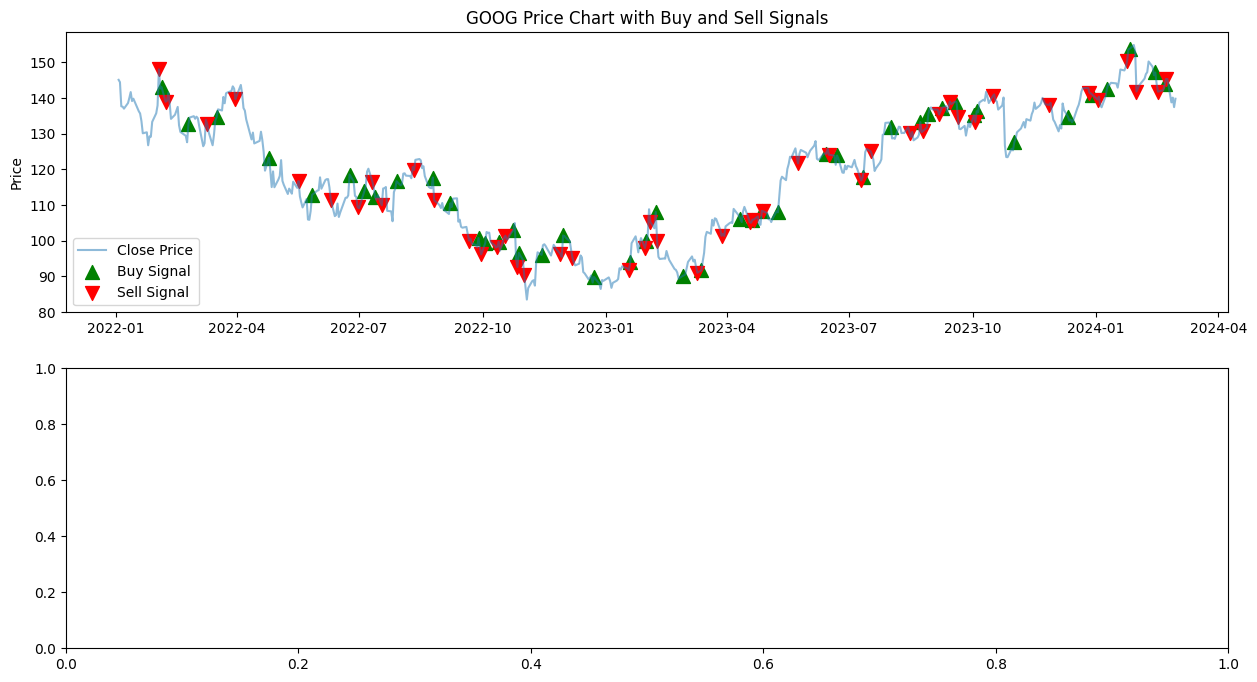

In [6]:
def plot_stock_with_rvi(data):
    # data = yf.download(stock_symbol, start=start_date, end=end_date)
    # data = demarker_indc(data, period)

    # # Generating Buy/Sell signals
    # data['Buy_Signal'] = (data['DeM'] < 0.3) & (data['DeM'].shift(1) >= 0.3)
    # data['Sell_Signal'] = (data['DeM'] > 0.7) & (data['DeM'].shift(1) <= 0.7)

    # Plotting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))

    # Stock price with buy and sell signals
    ax1.plot(data['close'], label='Close Price', alpha=0.5)
    ax1.scatter(data.index[data['buy_long']], data['close'][data['buy_long']], label='Buy Signal', marker='^', color='green', s=100)
    ax1.scatter(data.index[data['sell_short']], data['close'][data['sell_short']], label='Sell Signal', marker='v', color='red', s=100)
    ax1.set_title('GOOG Price Chart with Buy and Sell Signals')
    ax1.set_ylabel('Price')
    ax1.legend()

    # DeMarker Indicator
    ax2.plot(data['deMarker'], label='DeMarker', color='blue')
    ax2.axhline(0.7, color='red', linestyle='--', label='Overbought Threshold (0.725)')
    ax2.axhline(0.3, color='green', linestyle='--', label='Oversold Threshold (0.275)')
    ax2.set_title('DeMarker Indicator')
    ax2.set_ylabel('DeMarker Value')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Example usage
plot_stock_with_rvi(df_X)

In [ ]:
df_X

,open,high,low,close,adj close,volume,deMAX,deMIN,deMM,deMN,deMarker,buy_long,sell_short
Date,,,,,,,,,,,,,
2022-01-03,144.475494,145.550003,143.502502,145.074493,145.074493,25214000,0,0,NaN,NaN,NaN,False,False
2022-01-04,145.550507,146.610001,143.816147,144.416504,144.416504,22928000,0,0,NaN,NaN,NaN,False,False
2022-01-05,144.181000,144.298004,137.523499,137.653503,137.653503,49642000,0,6,NaN,NaN,NaN,False,False
2022-01-06,137.497498,139.686005,136.763504,137.550995,137.550995,29050000,0,0,NaN,NaN,NaN,False,False
2022-01-07,137.904999,138.254745,135.789001,137.004501,137.004501,19408000,0,0,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-23,144.970001,145.955002,144.789993,145.289993,145.289993,14519400,0,0,0.222222,0.888889,0.800000,False,True
2024-02-26,143.449997,143.839996,138.740005,138.750000,138.750000,33513000,0,6,0.222222,1.444444,0.866667,False,False
2024-02-27,139.410004,140.490005,138.500000,140.100006,140.100006,22364000,1,0,0.333333,1.222222,0.785714,False,False


In [ ]:
plot_data(df_X)

NameError: name 'plot_data' is not defined

In [ ]:
# def test():
#     assert myfunctions.chopp_idx_signals(data)

# test()